## Packages

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Cleaning

In [190]:
df=pd.read_csv('time-series-prediction/stock_price.csv')

In [191]:
df.columns

Index(['日付け', '終値', '始値', '高値', '安値', '出来高', '変化率 %'], dtype='object')

In [192]:
'Date', 'Close price', 'Open price', 'High price', 'Low price', 'Volume', '% change'

('Date',
 'Close price',
 'Open price',
 'High price',
 'Low price',
 'Volume',
 '% change')

In [193]:
df = df.rename(columns={
    '日付け': 'Date',
    '終値': 'Close price',
    '始値': 'Open price',
    '高値': 'High price',
    '安値': 'Low price',
    '出来高': 'Volume',
    '変化率 %': '% change'
})

In [194]:
df

Date  Close price  Open price  High price  Low price   Volume  \
0     2024-08-01        156.3       159.3       159.4      156.1   79.15M   
1     2024-07-31        160.4       158.2       160.7      158.1  173.91M   
2     2024-07-30        158.7       158.8       159.2      158.0  138.14M   
3     2024-07-29        159.7       158.7       160.2      158.4  126.28M   
4     2024-07-26        157.9       159.3       159.6      157.9  155.08M   
...          ...          ...         ...         ...        ...      ...   
9197  1987-02-18        191.2       186.3       191.2      186.3  795.09M   
9198  1987-02-17        182.4       176.5       184.3      175.5  881.51M   
9199  1987-02-16        175.5       166.7       175.5      165.7  360.51M   
9200  1987-02-13        172.5       176.5       176.5      172.5  422.38M   
9201  1987-02-12        182.4       182.4       182.4      182.4    1.28B   

     % change  
0      -2.56%  
1       1.07%  
2      -0.63%  
3       1.14%  
4      -0.13%  
...       ...  
9197    4.82%  
9198    3.93%  
9199    1.74%  
9200   -5.43%  
9201   16.25%  

[9202 rows x 7 columns]

In [195]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [196]:
df['Volume'] = df['Volume'].replace({'M': '*1e6', 'B': '*1e9'}, regex=True).map(pd.eval).astype(float)

In [197]:
# Clean and convert '% change' (removing '%' and converting to numeric)
df['% change'] = df['% change'].str.replace('%', '').astype(float)

In [198]:
df

Date  Close price  Open price  High price  Low price        Volume  \
0    2024-08-01        156.3       159.3       159.4      156.1  7.915000e+07   
1    2024-07-31        160.4       158.2       160.7      158.1  1.739100e+08   
2    2024-07-30        158.7       158.8       159.2      158.0  1.381400e+08   
3    2024-07-29        159.7       158.7       160.2      158.4  1.262800e+08   
4    2024-07-26        157.9       159.3       159.6      157.9  1.550800e+08   
...         ...          ...         ...         ...        ...           ...   
9197 1987-02-18        191.2       186.3       191.2      186.3  7.950900e+08   
9198 1987-02-17        182.4       176.5       184.3      175.5  8.815100e+08   
9199 1987-02-16        175.5       166.7       175.5      165.7  3.605100e+08   
9200 1987-02-13        172.5       176.5       176.5      172.5  4.223800e+08   
9201 1987-02-12        182.4       182.4       182.4      182.4  1.280000e+09   

      % change  
0        -2.56  
1         1.07  
2        -0.63  
3         1.14  
4        -0.13  
...        ...  
9197      4.82  
9198      3.93  
9199      1.74  
9200     -5.43  
9201     16.25  

[9202 rows x 7 columns]

In [199]:
# Get summary statistics for numeric columns
summary_statistics = df.describe()
print(summary_statistics)

                                Date  Close price   Open price   High price  \
count                           9202  9202.000000  9202.000000  9202.000000   
mean   2005-10-21 08:44:04.642469248    92.180961    92.256183    93.176451   
min              1987-02-12 00:00:00    33.000000    33.000000    33.200000   
25%              1996-06-06 06:00:00    52.000000    52.100000    52.800000   
50%              2005-10-11 12:00:00    85.100000    85.100000    86.050000   
75%              2015-03-04 18:00:00   110.800000   110.800000   111.900000   
max              2024-08-01 00:00:00   305.900000   309.800000   311.800000   
std                              NaN    50.452228    50.598215    51.049837   

         Low price        Volume     % change  
count  9202.000000  9.202000e+03  9202.000000  
mean     91.330146  1.726677e+08     0.017502  
min      32.200000  9.340000e+06   -14.740000  
25%      51.500000  8.073000e+07    -0.940000  
50%      84.200000  1.540150e+08     0.000000  


In [200]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Date           0
Close price    0
Open price     0
High price     0
Low price      0
Volume         0
% change       0
dtype: int64


## Exploartory Data Analysis

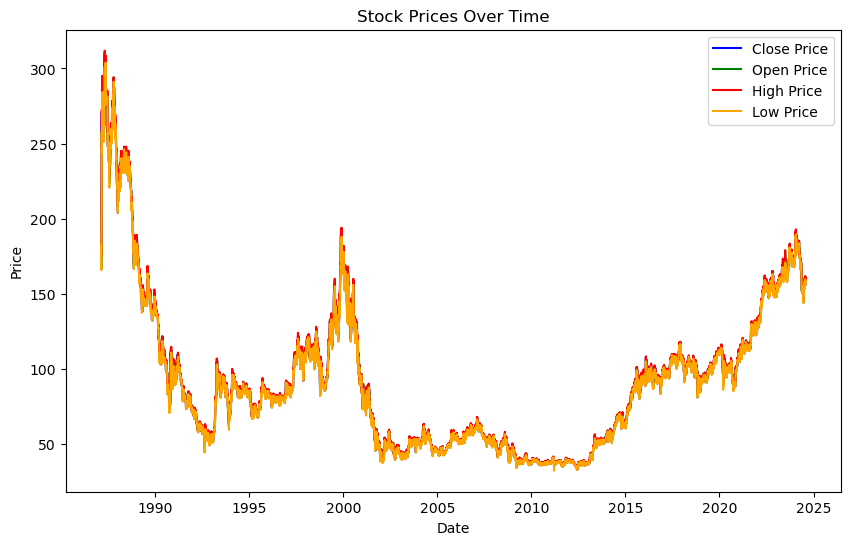

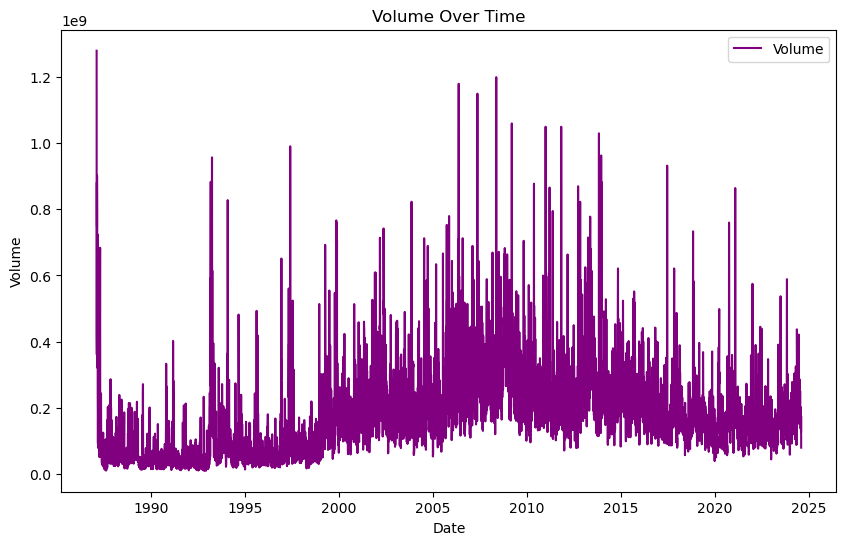

In [201]:
import matplotlib.pyplot as plt

# Plot Close, Open, High, and Low prices over time
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Close price'], label='Close Price', color='blue')
plt.plot(df['Date'], df['Open price'], label='Open Price', color='green')
plt.plot(df['Date'], df['High price'], label='High Price', color='red')
plt.plot(df['Date'], df['Low price'], label='Low Price', color='orange')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot Volume over time
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='purple')
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

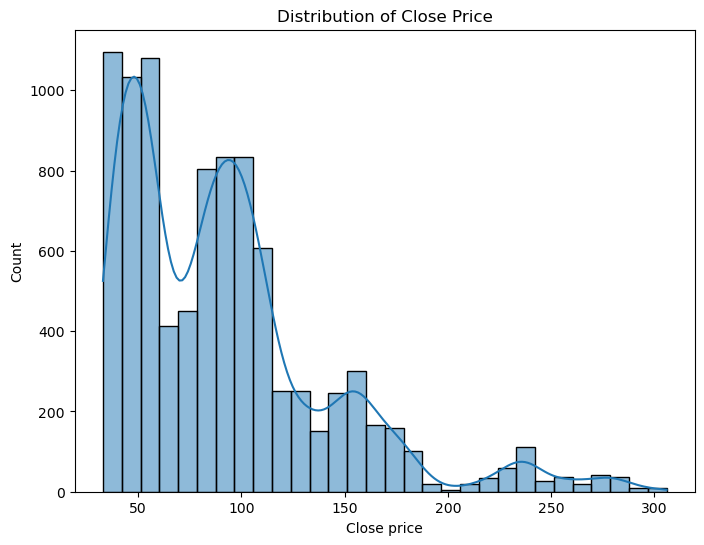

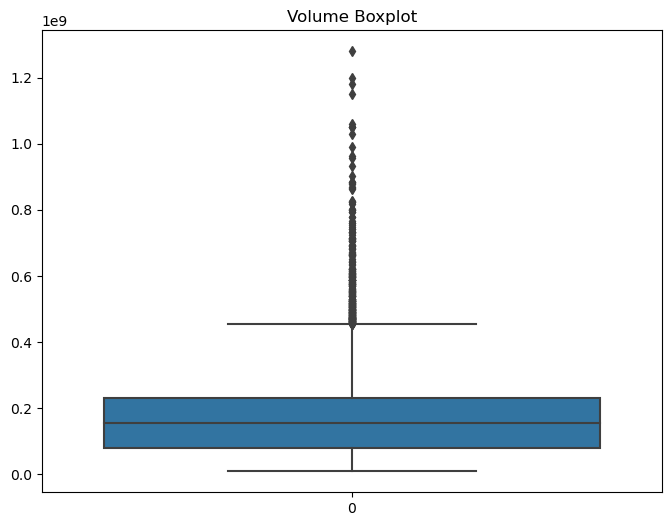

In [202]:
import seaborn as sns

# Histogram for Close price
plt.figure(figsize=(8,6))
sns.histplot(df['Close price'], bins=30, kde=True)
plt.title('Distribution of Close Price')
plt.show()

# Boxplot for detecting outliers in Volume
plt.figure(figsize=(8,6))
sns.boxplot(df['Volume'])
plt.title('Volume Boxplot')
plt.show()

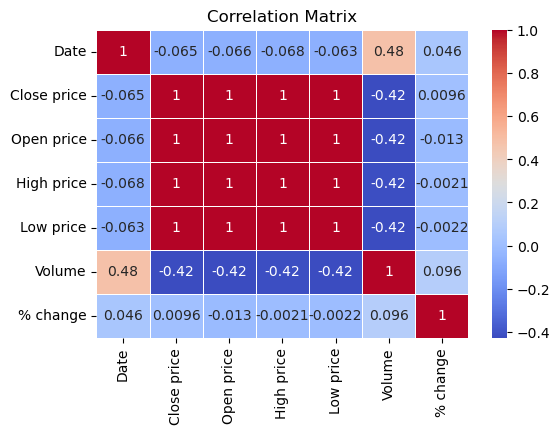

In [203]:
# Compute the correlation matrix
correlation_matrix = df.corr(method='spearman')

# Heatmap of the correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Remove Outliers

In [204]:
def remove_outliers(df, columns):
    # Loop through specified columns to remove outliers
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.10)
        Q3 = df[col].quantile(0.90)
        
        # Calculate IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Define outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out rows with outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Specify columns where outliers need to be removed
columns_with_outliers = ['Close price', 'Open price', 'High price', 'Low price', 'Volume', '% change']

# Remove outliers
df = remove_outliers(df, columns_with_outliers)

# Display the shape of the dataframe after removing outliers
print("Data shape after removing outliers:", df.shape)

Data shape after removing outliers: (9136, 7)


## Feature Engineering

In [205]:
df['ema_50'] = df['Close price'].ewm(span=50, adjust=False).mean()

In [206]:
df['volatility_30'] = df['Close price'].rolling(window=30).std()

In [207]:
df['ema_12'] = df['Close price'].ewm(span=12, adjust=False).mean()
df['ema_26'] = df['Close price'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['ema_12'] - df['ema_26']

In [208]:
df['ma_30'] = df['Close price'].rolling(window=30).mean()

In [209]:
df['bollinger_upper'] = df['ma_30'] + 2 * df['volatility_30']
df['bollinger_lower'] = df['ma_30'] - 2 * df['volatility_30']

In [210]:
df

Date  Close price  Open price  High price  Low price       Volume  \
0    2024-08-01        156.3       159.3       159.4      156.1   79150000.0   
1    2024-07-31        160.4       158.2       160.7      158.1  173910000.0   
2    2024-07-30        158.7       158.8       159.2      158.0  138140000.0   
3    2024-07-29        159.7       158.7       160.2      158.4  126280000.0   
4    2024-07-26        157.9       159.3       159.6      157.9  155080000.0   
...         ...          ...         ...         ...        ...          ...   
9191 1987-02-26        247.1       256.9       261.8      243.1  349450000.0   
9192 1987-02-25        252.9       258.8       262.7      252.0  733930000.0   
9196 1987-02-19        196.1       196.1       196.1      193.1  748250000.0   
9199 1987-02-16        175.5       166.7       175.5      165.7  360510000.0   
9200 1987-02-13        172.5       176.5       176.5      172.5  422380000.0   

      % change      ema_50  volatility_30      ema_12      ema_26       MACD  \
0        -2.56  156.300000            NaN  156.300000  156.300000   0.000000   
1         1.07  156.460784            NaN  156.930769  156.603704   0.327066   
2        -0.63  156.548597            NaN  157.202959  156.758985   0.443974   
3         1.14  156.672181            NaN  157.587119  156.976838   0.610281   
4        -0.13  156.720331            NaN  157.635254  157.045220   0.590034   
...        ...         ...            ...         ...         ...        ...   
9191     -2.29  273.610933      10.605488  268.939153  272.096440  -3.157287   
9192     -6.54  272.798739      11.103292  266.471591  270.674481  -4.202891   
9196      2.56  269.790946      17.502645  255.645192  265.150446  -9.505254   
9199      1.74  266.093262      24.276109  243.315163  258.509672 -15.194509   
9200     -5.43  262.422938      29.389685  232.420522  252.138585 -19.718063   

           ma_30  bollinger_upper  bollinger_lower  
0            NaN              NaN              NaN  
1            NaN              NaN              NaN  
2            NaN              NaN              NaN  
3            NaN              NaN              NaN  
4            NaN              NaN              NaN  
...          ...              ...              ...  
9191  271.150000       292.360976       249.939024  
9192  270.463333       292.669917       248.256749  
9196  267.850000       302.855290       232.844710  
9199  264.646667       313.198885       216.094449  
9200  261.146667       319.926038       202.367296  

[9136 rows x 15 columns]

In [211]:
delta = df['Close price'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['rsi'] = 100 - (100 / (1 + rs))

In [212]:
# Ensure the 'Date' column is in datetime format
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Create a new feature 'day_of_week' which represents the day of the week (0 = Monday, 6 = Sunday)
# df['day_of_week'] = df['Date'].dt.dayofweek

# Create a new feature 'day_name' which represents the day name (e.g., 'Monday')
# df['day_name'] = df['Date'].dt.strftime('%A')

# Create a new feature 'month' which represents the month number (1 = January, 12 = December)
df_clean['month'] = df_clean['Date'].dt.month

# Optional: If you want the actual names of the months
# df['month_name'] = df['Date'].dt.strftime('%B')

# Preview the dataframe to check the new columns
print(df_clean[['Date', 'month']].head())


         Date  month
42 2024-06-03      6
43 2024-05-31      5
44 2024-05-30      5
45 2024-05-29      5
46 2024-05-28      5


C:\Users\HP\AppData\Local\Temp\ipykernel_868\3939934947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date'] = pd.to_datetime(df_clean['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_868\3939934947.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['month'] = df_clean['Date'].dt.month


In [213]:
df3=df_clean[['Close price','ema_50', 'volatility_30', 'ema_12', 'ema_26', 'MACD', 'ma_30',
       'bollinger_upper', 'bollinger_lower', 'rsi', 'Rolling Mean',
       'Rolling Std', 'day_of_week', 'month']]

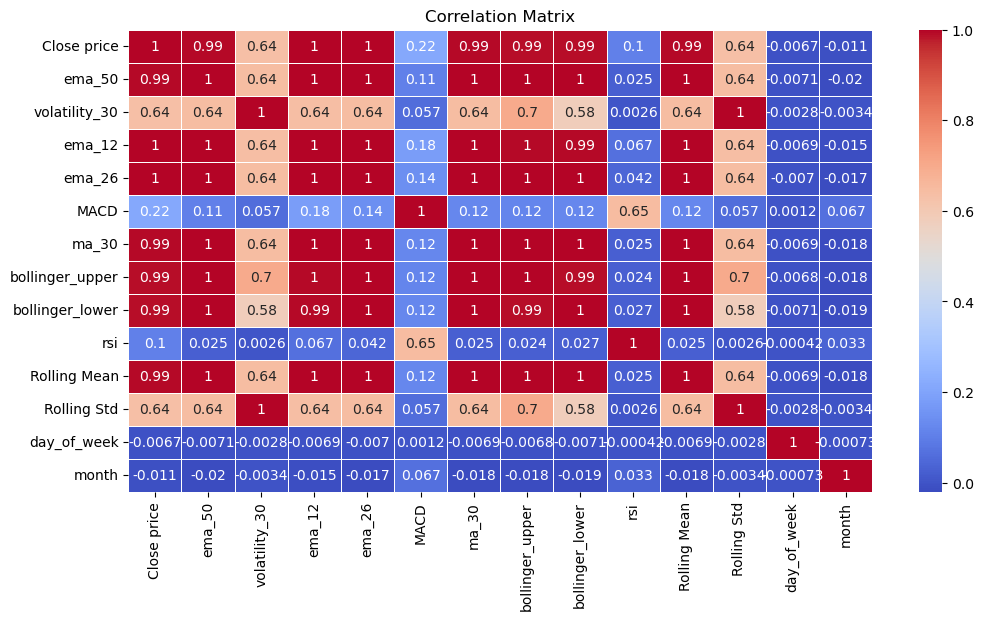

In [214]:
# Compute the correlation matrix
correlation_matrix = df3.corr(numeric_only=True)

# Heatmap of the correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

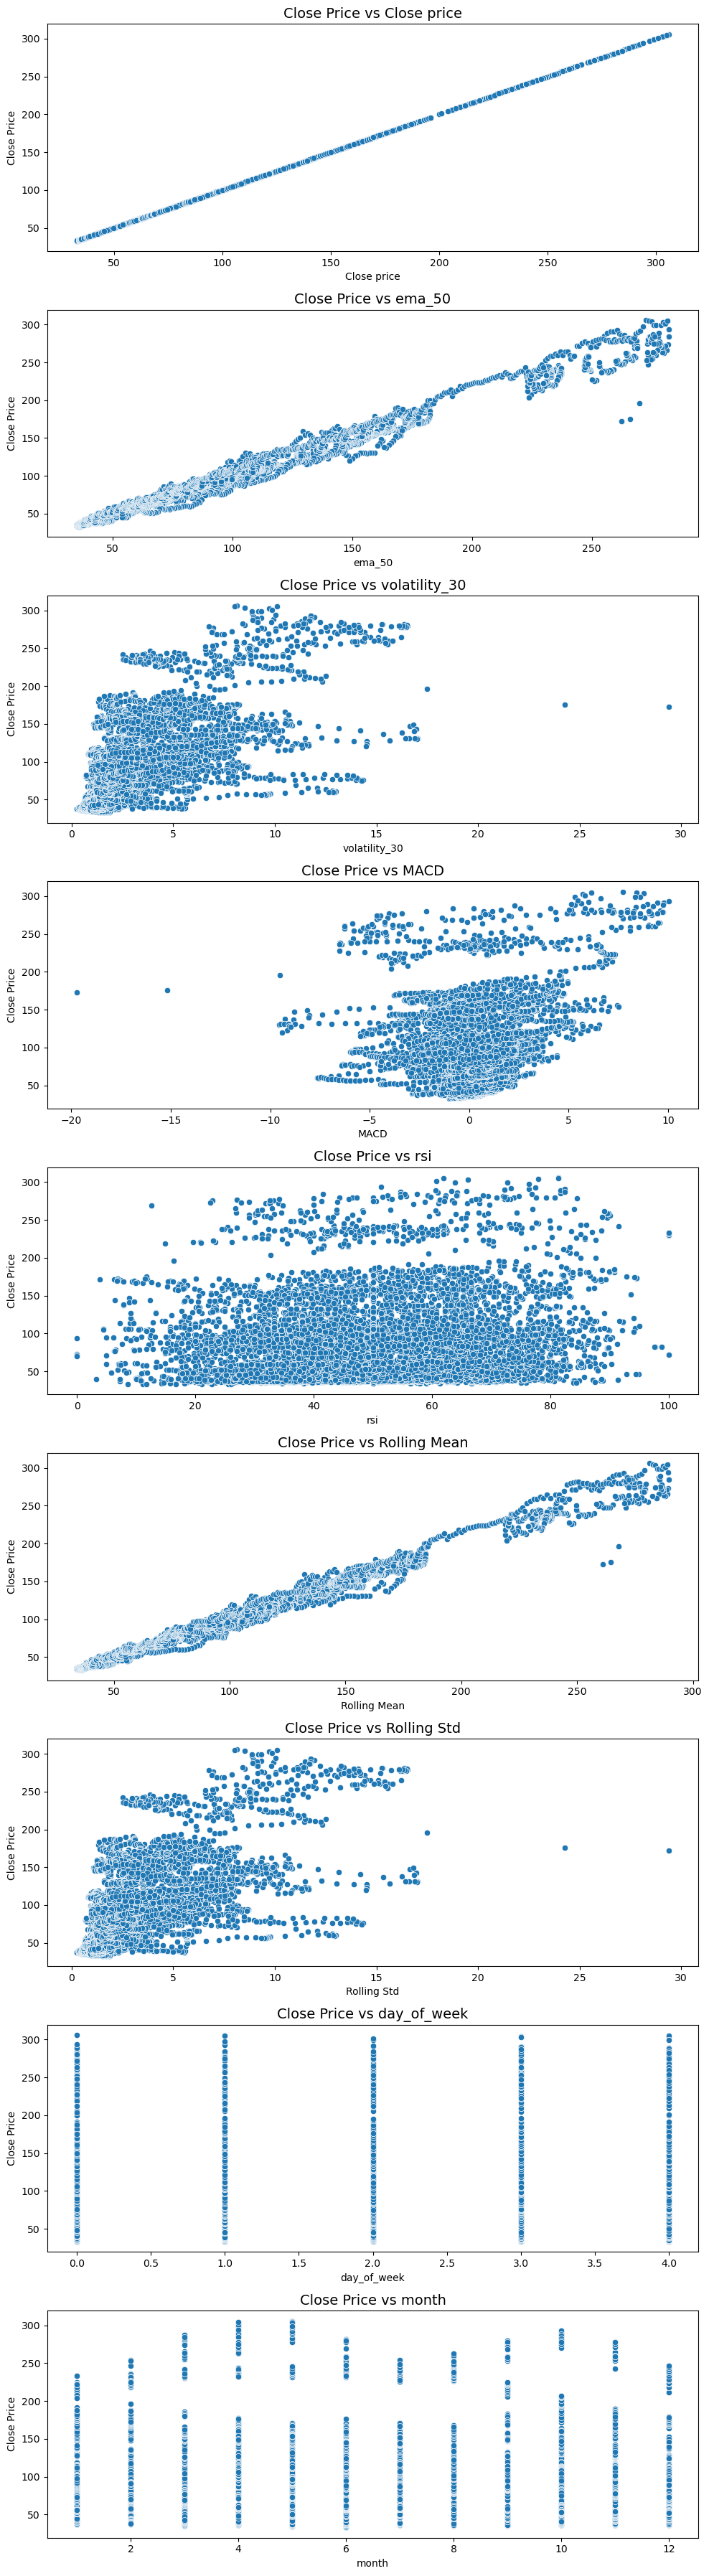

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataframe containing all the features and 'Close price' is the target

# List of features to plot against 'Close price'
features = ['Close price','ema_50', 'volatility_30', 'MACD', 'rsi', 'Rolling Mean','Rolling Std', 'day_of_week', 'month']

# Number of features
n_features = len(features)

# Creating subplots
fig, axs = plt.subplots(n_features, figsize=(10, 4 * n_features))

# Plot each feature vs Close price
for i, feature in enumerate(features):
    sns.scatterplot(x=df3[feature], y=df3['Close price'], ax=axs[i])
    axs[i].set_title(f'Close Price vs {feature}', fontsize=14)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Close Price')

# Adjust layout to avoid overlapping of plots
plt.tight_layout()

# Show the plots
plt.show()


## LSTM model with 1 feature (Moving Average of Closing Price)

In [216]:
data_training = pd.DataFrame(df['Close price'][0:int(len(df)*0.70)])
data_testing  = pd.DataFrame(df['Close price'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(6395, 1)
(2741, 1)


In [217]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [218]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.77939317],
       [0.80530973],
       [0.79456384],
       ...,
       [0.48040455],
       [0.505689  ],
       [0.51833123]])

In [219]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [220]:
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [221]:
model = Sequential()

model.add(LSTM(units=50 , activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60 , activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80 , activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120 , activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [222]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_24 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_25 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_25 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_26 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_26 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_27 (LSTM)              (None, 120)              

In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)


Epoch 1/50

197/197 [==============================] - 59s 261ms/step - loss: 0.0124
Epoch 2/50
197/197 [==============================] - 50s 255ms/step - loss: 0.0043
Epoch 3/50
197/197 [==============================] - 53s 272ms/step - loss: 0.0037
Epoch 4/50
197/197 [==============================] - 54s 277ms/step - loss: 0.0032
Epoch 5/50
197/197 [==============================] - 52s 262ms/step - loss: 0.0030
Epoch 6/50
197/197 [==============================] - 57s 290ms/step - loss: 0.0031
Epoch 7/50
197/197 [==============================] - 55s 278ms/step - loss: 0.0030
Epoch 8/50
197/197 [==============================] - 55s 281ms/step - loss: 0.0028
Epoch 9/50
197/197 [==============================] - 51s 258ms/step - loss: 0.0025
Epoch 10/50
197/197 [==============================] - 56s 282ms/step - loss: 0.0027
Epoch 11/50
197/197 [==============================] - 58s 293ms/step - loss: 0.0026
Epoch 12/50
197/197 [==============================] - 56s 282ms/step - 

In [27]:
past_100_days = data_training.tail(100)

In [28]:
final_df = pd.concat([past_100_days,data_testing])

In [29]:
final_df

Close price
6337        108.0
6338        105.0
6339        106.0
6340        107.0
6341        107.0
...           ...
9191        247.1
9192        252.9
9196        196.1
9199        175.5
9200        172.5

[2837 rows x 1 columns]

In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.24176245],
       [0.2302682 ],
       [0.23409962],
       ...,
       [0.57931034],
       [0.50038314],
       [0.48888889]])

In [31]:
input_data.shape

(2837, 1)

In [32]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [33]:
x_test,y_test = np.array(x_test),np.array(y_test)

In [34]:
print(x_test.shape)
print(y_test.shape)

(2737, 100, 1)
(2737,)


In [35]:
y_predicted = model.predict(x_test)

86/86 [==============================] - 7s 56ms/step


In [36]:
y_predicted.shape

(2737, 1)

In [37]:
y_test.shape

(2737,)

In [38]:
scaler.scale_

array([0.00383142])

In [39]:
scale_factor = 1/0.00682769
y_predicted = y_predicted*scale_factor
y_test = y_test* scale_factor

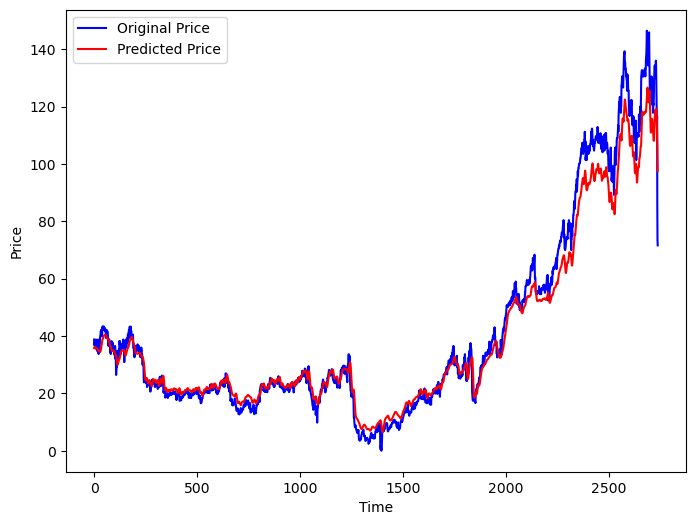

<Figure size 640x480 with 0 Axes>

In [43]:
plt.figure(figsize=(8,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
plt.savefig('LSTM_with_1_feature.jpg')

## Prophet Model

In [51]:
import pandas as pd
from prophet import Prophet

In [52]:
df

Date  Close price  Open price  High price  Low price       Volume  \
13   2024-07-12        158.7       158.9       160.5      158.5  250560000.0   
14   2024-07-11        159.5       159.0       160.3      158.4  228260000.0   
15   2024-07-10        158.3       156.2       158.3      155.7  226570000.0   
16   2024-07-09        156.5       154.3       157.0      153.5  214950000.0   
17   2024-07-08        154.3       155.0       155.3      152.9  250580000.0   
...         ...          ...         ...         ...        ...          ...   
9191 1987-02-26        247.1       256.9       261.8      243.1  349450000.0   
9192 1987-02-25        252.9       258.8       262.7      252.0  733930000.0   
9196 1987-02-19        196.1       196.1       196.1      193.1  748250000.0   
9199 1987-02-16        175.5       166.7       175.5      165.7  360510000.0   
9200 1987-02-13        172.5       176.5       176.5      172.5  422380000.0   

      % change    MA_5   MA_10  Price Range  ...     RSI_14      ema_50  \
13       -0.50  159.08  159.05          2.0  ...  56.000000  158.700000   
14        0.76  159.18  159.21          1.9  ...  57.692308  158.731373   
15        1.15  158.68  159.23          2.6  ...  44.134078  158.714456   
16        1.43  158.04  159.03          3.5  ...  43.888889  158.627615   
17       -1.03  157.46  158.39          2.4  ...  35.937500  158.457904   
...        ...     ...     ...          ...  ...        ...         ...   
9191     -2.29  264.70  273.05         18.7  ...  30.029155  273.610933   
9192     -6.54  258.42  270.30         10.7  ...  32.773109  272.798739   
9196      2.56  233.14  248.92          3.0  ...  22.432963  269.790946   
9199      1.74  191.20  221.58          9.8  ...  17.348809  266.093262   
9200     -5.43  183.54  213.44          4.0  ...  14.524104  262.422938   

      volatility_30      ema_12      ema_26       MACD       ma_30  \
13              NaN  158.700000  158.700000   0.000000         NaN   
14              NaN  158.823077  158.759259   0.063818         NaN   
15              NaN  158.742604  158.725240   0.017363         NaN   
16              NaN  158.397588  158.560407  -0.162820         NaN   
17              NaN  157.767190  158.244822  -0.477632         NaN   
...             ...         ...         ...        ...         ...   
9191      10.605488  268.939153  272.096440  -3.157287  271.150000   
9192      11.103292  266.471591  270.674481  -4.202891  270.463333   
9196      17.502645  255.645192  265.150446  -9.505254  267.850000   
9199      24.276109  243.315163  258.509672 -15.194509  264.646667   
9200      29.389685  232.420522  252.138585 -19.718063  261.146667   

      bollinger_upper  bollinger_lower        rsi  
13                NaN              NaN        NaN  
14                NaN              NaN        NaN  
15                NaN              NaN        NaN  
16                NaN              NaN        NaN  
17                NaN              NaN        NaN  
...               ...              ...        ...  
9191       292.360976       249.939024  30.029155  
9192       292.669917       248.256749  32.773109  
9196       302.855290       232.844710  16.360734  
9199       313.198885       216.094449  11.690141  
9200       319.926038       202.367296  11.448276  

[9123 rows x 25 columns]

In [53]:
df2=df[['Date','Close price']]

In [54]:
df2.rename({'Date':'ds','Close price':'y'},axis=1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_868\1008536735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename({'Date':'ds','Close price':'y'},axis=1,inplace=True)


In [55]:
m = Prophet()
m.fit(df2)

18:17:22 - cmdstanpy - INFO - Chain [1] start processing
18:17:27 - cmdstanpy - INFO - Chain [1] done processing


In [56]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
9483 2025-07-08
9484 2025-07-09
9485 2025-07-10
9486 2025-07-11
9487 2025-07-12

In [161]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
9496 2025-07-28  176.492737  159.365180  192.141955
9497 2025-07-29  176.685501  159.005423  192.865900
9498 2025-07-30  176.717616  159.277232  192.779229
9499 2025-07-31  176.693752  158.731178  192.134461
9500 2025-08-01  176.629907  158.875515  193.674340

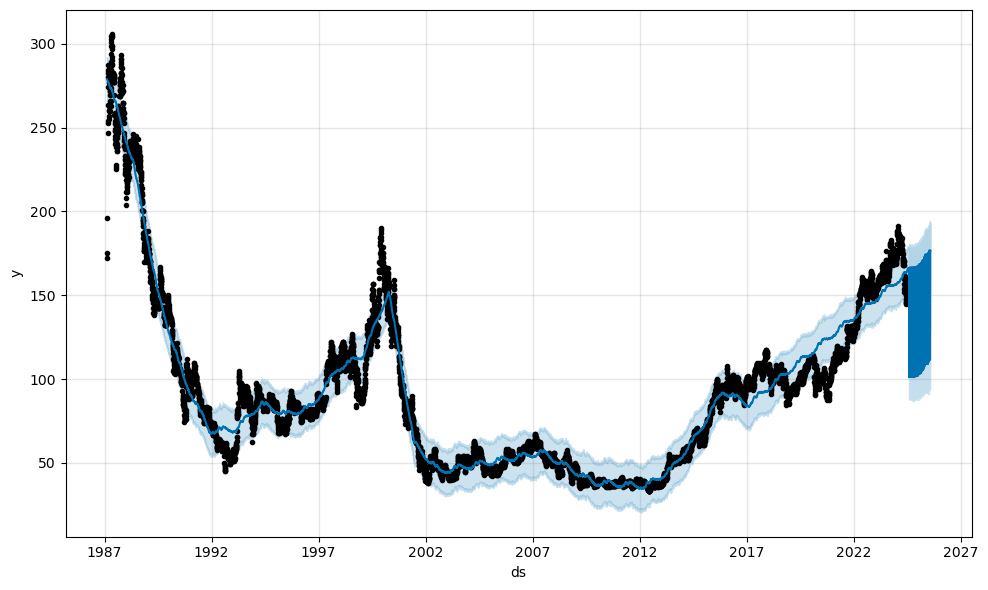

In [162]:
# Python
fig1 = m.plot(forecast)

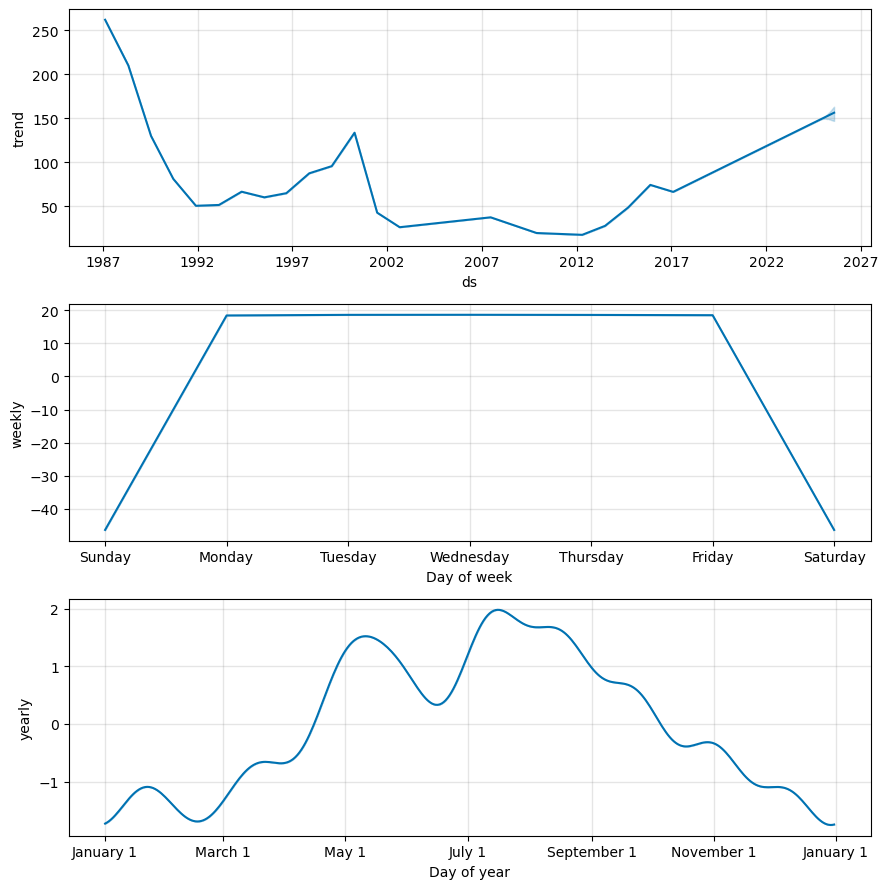

In [163]:
# Python
fig2 = m.plot_components(forecast)

In [57]:
df.isnull().sum()

Date                0
Close price         0
Open price          0
High price          0
Low price           0
Volume              0
% change            0
MA_5                0
MA_10               0
Price Range         0
Lag_1_Close         0
Lag_2_Close         0
Lag_3_Close         0
MA_Volume_5         0
MA_Volume_10        0
RSI_14              0
ema_50              0
volatility_30      29
ema_12              0
ema_26              0
MACD                0
ma_30              29
bollinger_upper    29
bollinger_lower    29
rsi                13
dtype: int64

(array([119., 741., 159., 236., 334., 169., 533., 365., 323., 167., 163.,
         99.,  93., 106., 100., 104., 102., 222., 199., 222., 289., 159.,
        240., 322., 279., 264., 245., 163., 184., 139., 195., 170.,  63.,
         48.,  22.,  48.,  98.,  47.,  53.,  53.,  45.,  43.,  67.,  65.,
         51.,  95.,  84.,  92.,  82.,  37.,  53.,  72.,  18.,  29.,  57.,
         53.,  48.,  34.,  27.,   5.,   3.,   3.,   3.,   2.,   2.,   1.,
          3.,   2.,   2.,   3.,   2.,   3.,  15.,  12.,  11.,   9.,  12.,
         41.,  20.,  58.,  17.,  12.,   9.,   7.,   9.,   4.,   7.,   6.,
          9.,   6.,   7.,   8.,  13.,  14.,  15.,  17.,   4.,   5.,  12.,
         12.]),
 array([ 34.08333333,  36.63826667,  39.1932    ,  41.74813333,
         44.30306667,  46.858     ,  49.41293333,  51.96786667,
         54.5228    ,  57.07773333,  59.63266667,  62.1876    ,
         64.74253333,  67.29746667,  69.8524    ,  72.40733333,
         74.96226667,  77.5172    ,  80.07213333,  82.62706667

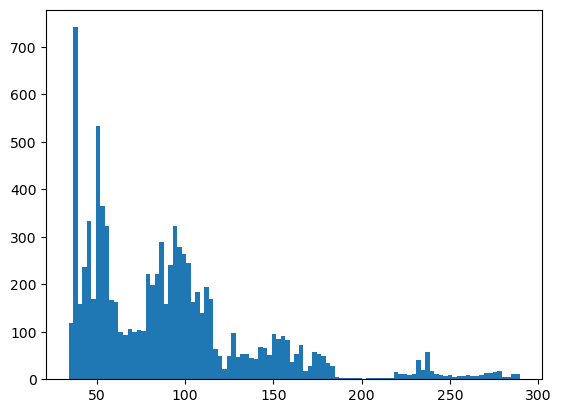

In [60]:
plt.hist(df['Rolling Mean'],bins=100)

In [61]:
# Drop rows with any null values
df_clean = df.dropna()

In [62]:
df_clean.isnull().sum()

Date               0
Close price        0
Open price         0
High price         0
Low price          0
Volume             0
% change           0
MA_5               0
MA_10              0
Price Range        0
Lag_1_Close        0
Lag_2_Close        0
Lag_3_Close        0
MA_Volume_5        0
MA_Volume_10       0
RSI_14             0
ema_50             0
volatility_30      0
ema_12             0
ema_26             0
MACD               0
ma_30              0
bollinger_upper    0
bollinger_lower    0
rsi                0
Rolling Mean       0
Rolling Std        0
dtype: int64

In [63]:
# Ensure the 'Date' column is in datetime format
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Create a new feature 'day_of_week' which represents the day of the week
# 0 = Monday, 6 = Sunday
df_clean['day_of_week'] = df_clean['Date'].dt.dayofweek

# Optional: If you prefer to have the actual names of the days instead of numerical values
# You can use dt.strftime() to get day names
# df['day_name'] = df['Date'].dt.strftime('%A')

# Preview the dataframe to check the new columns
print(df_clean[['Date', 'day_of_week']].head())


         Date  day_of_week
42 2024-06-03            0
43 2024-05-31            4
44 2024-05-30            3
45 2024-05-29            2
46 2024-05-28            1


C:\Users\HP\AppData\Local\Temp\ipykernel_868\688809054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date'] = pd.to_datetime(df_clean['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_868\688809054.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['day_of_week'] = df_clean['Date'].dt.dayofweek


In [64]:
df_clean

Date  Close price  Open price  High price  Low price       Volume  \
42   2024-06-03        155.0       155.9       156.4      154.6  156840000.0   
43   2024-05-31        154.3       152.0       154.7      152.0  301190000.0   
44   2024-05-30        152.2       151.8       153.0      151.2  170570000.0   
45   2024-05-29        152.0       153.6       154.4      152.0  215770000.0   
46   2024-05-28        153.8       156.2       156.8      153.2  236010000.0   
...         ...          ...         ...         ...        ...          ...   
9191 1987-02-26        247.1       256.9       261.8      243.1  349450000.0   
9192 1987-02-25        252.9       258.8       262.7      252.0  733930000.0   
9196 1987-02-19        196.1       196.1       196.1      193.1  748250000.0   
9199 1987-02-16        175.5       166.7       175.5      165.7  360510000.0   
9200 1987-02-13        172.5       176.5       176.5      172.5  422380000.0   

      % change    MA_5   MA_10  Price Range  ...      ema_12      ema_26  \
42        0.45  152.60  150.67          1.8  ...  151.327452  151.788059   
43        1.38  153.46  151.45          2.7  ...  151.784767  151.974129   
44        0.13  153.64  151.89          1.8  ...  151.848649  151.990860   
45       -1.17  153.54  152.29          2.4  ...  151.871934  151.991537   
46       -1.28  153.46  152.65          3.6  ...  152.168559  152.125497   
...        ...     ...     ...          ...  ...         ...         ...   
9191     -2.29  264.70  273.05         18.7  ...  268.939153  272.096440   
9192     -6.54  258.42  270.30         10.7  ...  266.471591  270.674481   
9196      2.56  233.14  248.92          3.0  ...  255.645192  265.150446   
9199      1.74  191.20  221.58          9.8  ...  243.315163  258.509672   
9200     -5.43  183.54  213.44          4.0  ...  232.420522  252.138585   

           MACD       ma_30  bollinger_upper  bollinger_lower        rsi  \
42    -0.460608  152.070000       161.016454       143.123546  77.397260   
43    -0.189362  151.923333       160.558895       143.287772  79.020979   
44    -0.142211  151.680000       159.829872       143.530128  70.625000   
45    -0.119604  151.470000       159.229337       143.710663  70.186335   
46     0.043062  151.380000       158.958445       143.801555  75.722543   
...         ...         ...              ...              ...        ...   
9191  -3.157287  271.150000       292.360976       249.939024  30.029155   
9192  -4.202891  270.463333       292.669917       248.256749  32.773109   
9196  -9.505254  267.850000       302.855290       232.844710  16.360734   
9199 -15.194509  264.646667       313.198885       216.094449  11.690141   
9200 -19.718063  261.146667       319.926038       202.367296  11.448276   

      Rolling Mean  Rolling Std  day_of_week  
42      152.070000     4.473227            0  
43      151.923333     4.317781            4  
44      151.680000     4.074936            3  
45      151.470000     3.879668            2  
46      151.380000     3.789222            1  
...            ...          ...          ...  
9191    271.150000    10.605488            3  
9192    270.463333    11.103292            2  
9196    267.850000    17.502645            3  
9199    264.646667    24.276109            0  
9200    261.146667    29.389685            4  

[9094 rows x 28 columns]

In [66]:
df.isnull().sum()

Date                0
Close price         0
Open price          0
High price          0
Low price           0
Volume              0
% change            0
MA_5                0
MA_10               0
Price Range         0
Lag_1_Close         0
Lag_2_Close         0
Lag_3_Close         0
MA_Volume_5         0
MA_Volume_10        0
RSI_14              0
ema_50              0
volatility_30      29
ema_12              0
ema_26              0
MACD                0
ma_30              29
bollinger_upper    29
bollinger_lower    29
rsi                13
Rolling Mean       29
Rolling Std        29
dtype: int64

In [67]:
# Drop rows with any null values
df_clean.dropna(inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_868\3482399787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.dropna(inplace=True)


In [69]:
df_clean.shape

(9094, 29)

In [72]:
df_clean.columns

Index(['Date', 'Close price', 'Open price', 'High price', 'Low price',
       'Volume', '% change', 'MA_5', 'MA_10', 'Price Range', 'Lag_1_Close',
       'Lag_2_Close', 'Lag_3_Close', 'MA_Volume_5', 'MA_Volume_10', 'RSI_14',
       'ema_50', 'volatility_30', 'ema_12', 'ema_26', 'MACD', 'ma_30',
       'bollinger_upper', 'bollinger_lower', 'rsi', 'Rolling Mean',
       'Rolling Std', 'day_of_week', 'month'],
      dtype='object')

In [88]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your dataframe and 'Close price' is the target column
# Dropping 'Date' since it is not useful directly as a feature for regression
X = df.drop(columns=['Close price', 'Date'])
y = df['Close price']

# Handle missing values (e.g., using forward fill or any other method)
X.fillna(method='ffill', inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Get feature importance
importance = rf.feature_importances_

# Create a dataframe for better visualization
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort the dataframe by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance using Random Forest')
plt.show()

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define the feature matrix and target variable
X = df.drop(columns=['Close price', 'Date'])
y = df['Close price']

# Handle missing values (e.g., using forward fill)
X.fillna(method='ffill', inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize RFE with 5 features to be selected (you can adjust the number of features)
rfe = RFE(estimator=rf, n_features_to_select=5)

# Fit RFE
rfe.fit(X_train, y_train)

# Get the ranking of the features
rfe_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})

# Sort by ranking
rfe_ranking = rfe_ranking.sort_values(by='Ranking')

# Display the selected features (features with rank 1 are selected)
print(rfe_ranking)

In [48]:
df_clean.columns

Index(['Date', 'Close price', 'Open price', 'High price', 'Low price',
       'Volume', '% change', 'Rolling Mean', 'Rolling Std', 'high_low_spread',
       'ema_50', 'volatility_30', 'ema_12', 'ema_26', 'MACD', 'ma_30',
       'bollinger_upper', 'bollinger_lower', 'rsi', 'day_of_week', 'month'],
      dtype='object')

In [49]:
x_train.shape

(6295, 100, 1)

In [89]:
df4=df_clean[features]

In [90]:
df4

Close price      ema_50  volatility_30       MACD        rsi  \
42          155.0  153.562338       4.473227  -0.460608  77.397260   
43          154.3  153.591266       4.317781  -0.189362  79.020979   
44          152.2  153.536707       4.074936  -0.142211  70.625000   
45          152.0  153.476444       3.879668  -0.119604  70.186335   
46          153.8  153.489132       3.789222   0.043062  75.722543   
...           ...         ...            ...        ...        ...   
9191        247.1  273.610933      10.605488  -3.157287  30.029155   
9192        252.9  272.798739      11.103292  -4.202891  32.773109   
9196        196.1  269.790946      17.502645  -9.505254  16.360734   
9199        175.5  266.093262      24.276109 -15.194509  11.690141   
9200        172.5  262.422938      29.389685 -19.718063  11.448276   

      Rolling Mean  Rolling Std  day_of_week  month  
42      152.070000     4.473227            0      6  
43      151.923333     4.317781            4      5  
44      151.680000     4.074936            3      5  
45      151.470000     3.879668            2      5  
46      151.380000     3.789222            1      5  
...            ...          ...          ...    ...  
9191    271.150000    10.605488            3      2  
9192    270.463333    11.103292            2      2  
9196    267.850000    17.502645            3      2  
9199    264.646667    24.276109            0      2  
9200    261.146667    29.389685            4      2  

[9094 rows x 9 columns]

In [96]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming your DataFrame is named df
# Step 1: Separate Features and Target Variable
X = df4['Rolling Mean']  # Exclude the target variable
y = df4['Close price']  # Target variable

# Step 2: Normalize the Features
scaler = MinMaxScaler()  # Initialize the scaler
X_scaled = scaler.fit_transform(X)  # Fit and transform the data

# Step 3: Reshape the Data for LSTM
# LSTM requires input in the shape (samples, timesteps, features)
# For this example, let's assume we want to use 1 timestep
X_train = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])  # Reshape to (samples, 1, features)

# Optionally, you can check the shape of your training data
print("Shape of X_train:", X_train.shape)
print("Shape of y:", y.shape)

ValueError: Expected 2D array, got 1D array instead:
array=[152.07       151.92333333 151.68       ... 267.85       264.64666667
 261.14666667].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [107]:
data_training = pd.DataFrame(df4[0:int(len(df4)*0.70)])
data_testing  = pd.DataFrame(df4[int(len(df4)*0.70):int(len(df4))])

print(data_training.shape)
print(data_testing.shape)

(6365, 9)
(2729, 9)


In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [108]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.77117573, 0.80427153, 0.25135586, ..., 0.25135586, 0.        ,
        0.45454545],
       [0.76675095, 0.80446775, 0.24208958, ..., 0.24208958, 1.        ,
        0.36363636],
       [0.75347661, 0.80409767, 0.2276134 , ..., 0.2276134 , 0.75      ,
        0.36363636],
       ...,
       [0.48672566, 0.52468269, 0.11157593, ..., 0.11157593, 0.75      ,
        0.27272727],
       [0.48672566, 0.52405918, 0.11322318, ..., 0.11322318, 0.5       ,
        0.27272727],
       [0.49304678, 0.52372613, 0.11221817, ..., 0.11221817, 0.25      ,
        0.27272727]])

In [115]:
data_training_array.shape

(6365, 9)

In [129]:
data_training_array[0][:].shape

(9,)

In [124]:
y_train=data_training_array[:][0]
x_train=data_training_array[1:][:]

In [126]:
x_train.shape

(6364, 9)

## LSTM model with 1 feature (Moving Average of Closing Price)

In [130]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Assuming 'df' is your dataset of shape (6364, 9)

# Step 1: Separate features and target
X = df4.iloc[:, 1:].values  # Features (shape: (6364, 8))
y = df4.iloc[:, 0].values   # Target (shape: (6364,))

# Step 2: Scale the data using MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)  # Scale the features
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))  # Scale the target and reshape for scaling

# Step 3: Reshape the input data to 3D format for LSTM
# Assuming you're working with time steps, here we'll treat each row as one time step
X_train = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Step 4: Build the LSTM model (the one you provided)
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the model (assuming 80-20 split)
from sklearn.model_selection import train_test_split

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_scaled, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train_split, y_train_split, epochs=50, batch_size=32, validation_data=(X_val_split, y_val_split))

# To make predictions:
# predicted_values = model.predict(X_val_split)

Epoch 1/50
228/228 [==============================] - 17s 35ms/step - loss: 0.0183 - val_loss: 0.0026
Epoch 2/50
228/228 [==============================] - 6s 27ms/step - loss: 0.0042 - val_loss: 0.0023
Epoch 3/50
228/228 [==============================] - 6s 27ms/step - loss: 0.0036 - val_loss: 0.0015
Epoch 4/50
228/228 [==============================] - 7s 29ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 5/50
228/228 [==============================] - 6s 28ms/step - loss: 0.0022 - val_loss: 7.2092e-04
Epoch 6/50
228/228 [==============================] - 6s 28ms/step - loss: 0.0019 - val_loss: 6.9668e-04
Epoch 7/50
228/228 [==============================] - 6s 28ms/step - loss: 0.0018 - val_loss: 8.8575e-04
Epoch 8/50
228/228 [==============================] - 6s 27ms/step - loss: 0.0017 - val_loss: 4.8303e-04
Epoch 9/50
228/228 [==============================] - 7s 31ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 10/50
228/228 [==============================] - 8s 35ms/step - loss

In [149]:
import matplotlib.pyplot as plt

# Predict on the test (validation) set
predicted_values = model.predict(X_val_split)

# Inverse transform the scaled predictions and actual values to their original form
predicted_values_inverse = scaler_y.inverse_transform(predicted_values)
y_val_inverse = scaler_y.inverse_transform(y_val_split)

# Step 1: Plotting the actual vs predicted values


57/57 [==============================] - 1s 9ms/step


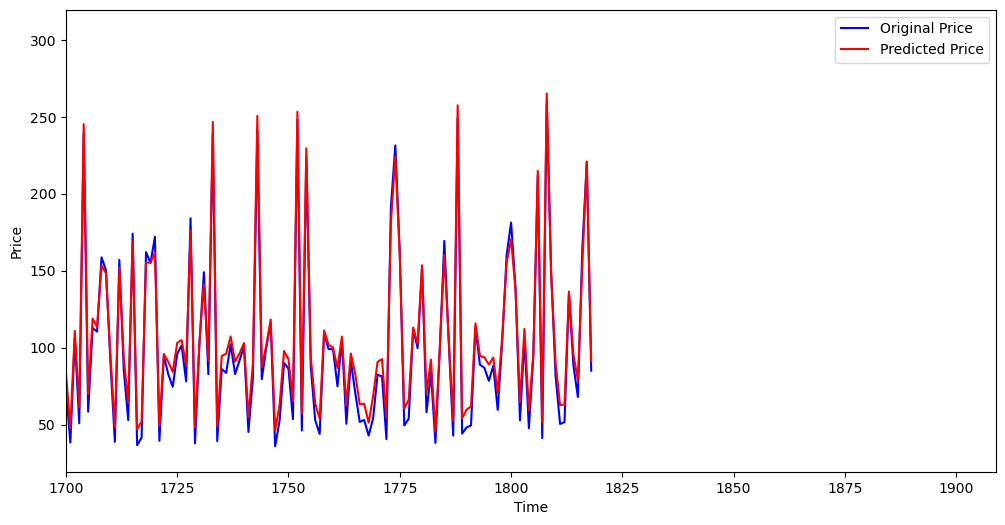

In [145]:
plt.figure(figsize=(12,6))
plt.plot(y_val_inverse,'b',label='Original Price')
plt.plot(predicted_values_inverse,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xlim(1700)
plt.legend()
plt.show()

Mean Squared Error: 76.5013710501352


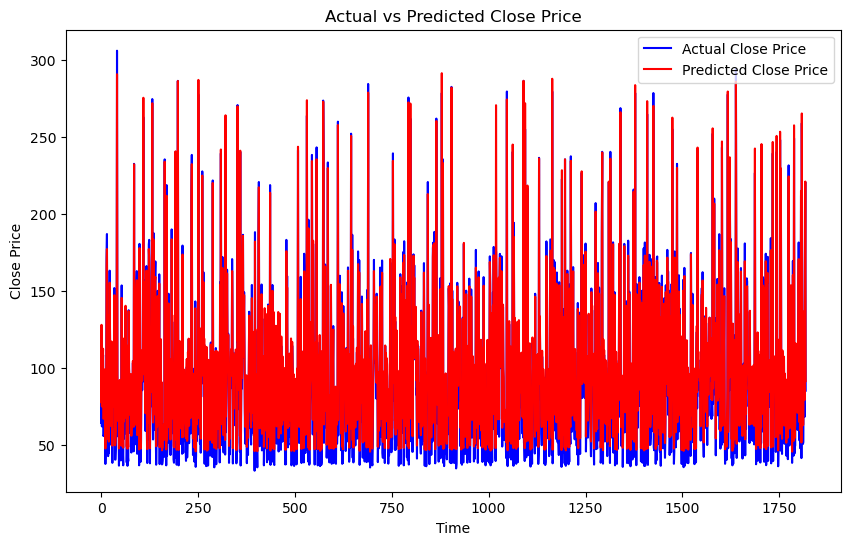

In [151]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already split your data and trained your LSTM model
# y_test contains the true values for testing set
# y_pred contains the predicted values from the model

# Rescale the predictions back to the original scale if using MinMaxScaler
# y_test_scaled = scaler.inverse_transform(y_val_split)
# y_pred_scaled = scaler.inverse_transform(predicted_values)

# Step 1: Calculate Mean Squared Error
mse = mean_squared_error(y_val_inverse, predicted_values_inverse)
print(f"Mean Squared Error: {mse}")

# Step 2: Plot actual vs predicted close price
plt.figure(figsize=(10, 6))
plt.plot(y_val_inverse, label='Actual Close Price', color='blue')
plt.plot(predicted_values_inverse, label='Predicted Close Price', color='red')
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## With Activation Tanh

In [22]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [152]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Assuming 'df' is your dataset of shape (6364, 9)

# Step 1: Separate features and target
X = df4.iloc[:, 1:].values  # Features (shape: (6364, 8))
y = df4.iloc[:, 0].values   # Target (shape: (6364,))

# Step 2: Scale the data using MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)  # Scale the features
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))  # Scale the target and reshape for scaling

# Step 3: Reshape the input data to 3D format for LSTM
# Assuming you're working with time steps, here we'll treat each row as one time step
X_train = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Step 4: Build the LSTM model (the one you provided)
model = Sequential()

model.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(units=1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the model (assuming 80-20 split)
from sklearn.model_selection import train_test_split

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_scaled, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train_split, y_train_split, epochs=50, batch_size=32, validation_data=(X_val_split, y_val_split))

# To make predictions:
# predicted_values = model.predict(X_val_split)

Epoch 1/50
228/228 [==============================] - 24s 44ms/step - loss: 0.0085 - val_loss: 0.0028
Epoch 2/50
228/228 [==============================] - 8s 36ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 3/50
228/228 [==============================] - 9s 41ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 4/50
228/228 [==============================] - 9s 39ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 5/50
228/228 [==============================] - 9s 41ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 6/50
228/228 [==============================] - 7s 32ms/step - loss: 0.0020 - val_loss: 8.9306e-04
Epoch 7/50
228/228 [==============================] - 7s 29ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 8/50
228/228 [==============================] - 7s 29ms/step - loss: 0.0019 - val_loss: 9.1360e-04
Epoch 9/50
228/228 [==============================] - 7s 29ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 10/50
228/228 [==============================] - 7s 29ms/step - loss: 0.0016

In [153]:
import matplotlib.pyplot as plt

# Predict on the test (validation) set
predicted_values = model.predict(X_val_split)

# Inverse transform the scaled predictions and actual values to their original form
predicted_values_inverse = scaler_y.inverse_transform(predicted_values)
y_val_inverse = scaler_y.inverse_transform(y_val_split)

# Step 1: Plotting the actual vs predicted values


57/57 [==============================] - 4s 13ms/step


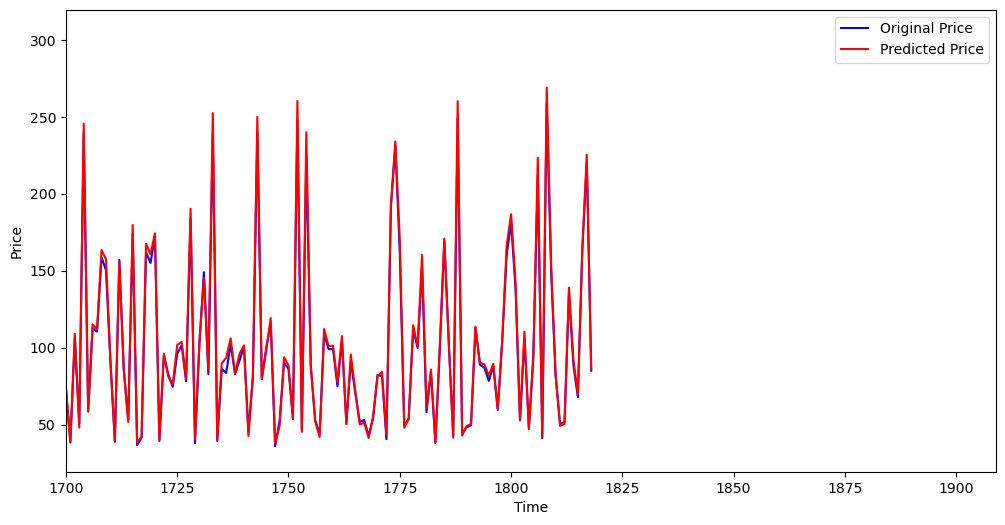

In [154]:
plt.figure(figsize=(12,6))
plt.plot(y_val_inverse,'b',label='Original Price')
plt.plot(predicted_values_inverse,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xlim(1700)
plt.legend()
plt.show()

Mean Squared Error: 15.003433952907733


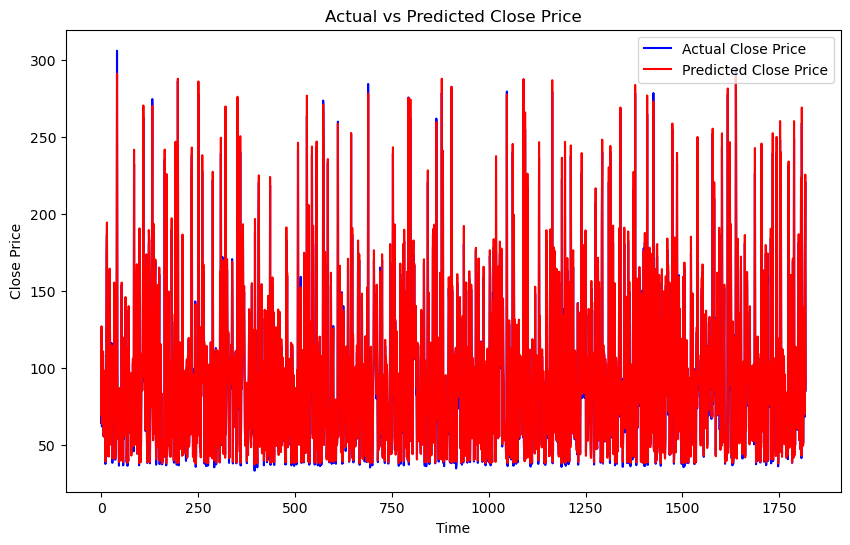

In [155]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already split your data and trained your LSTM model
# y_test contains the true values for testing set
# y_pred contains the predicted values from the model

# Rescale the predictions back to the original scale if using MinMaxScaler
# y_test_scaled = scaler.inverse_transform(y_val_split)
# y_pred_scaled = scaler.inverse_transform(predicted_values)

# Step 1: Calculate Mean Squared Error
mse = mean_squared_error(y_val_inverse, predicted_values_inverse)
print(f"Mean Squared Error: {mse}")

# Step 2: Plot actual vs predicted close price
plt.figure(figsize=(10, 6))
plt.plot(y_val_inverse, label='Actual Close Price', color='blue')
plt.plot(predicted_values_inverse, label='Predicted Close Price', color='red')
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [23]:
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [24]:
model = Sequential()

model.add(LSTM(units=50 , activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60 , activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80 , activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120 , activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)


Epoch 1/50

197/197 [==============================] - 59s 261ms/step - loss: 0.0124
Epoch 2/50
197/197 [==============================] - 50s 255ms/step - loss: 0.0043
Epoch 3/50
197/197 [==============================] - 53s 272ms/step - loss: 0.0037
Epoch 4/50
197/197 [==============================] - 54s 277ms/step - loss: 0.0032
Epoch 5/50
197/197 [==============================] - 52s 262ms/step - loss: 0.0030
Epoch 6/50
197/197 [==============================] - 57s 290ms/step - loss: 0.0031
Epoch 7/50
197/197 [==============================] - 55s 278ms/step - loss: 0.0030
Epoch 8/50
197/197 [==============================] - 55s 281ms/step - loss: 0.0028
Epoch 9/50
197/197 [==============================] - 51s 258ms/step - loss: 0.0025
Epoch 10/50
197/197 [==============================] - 56s 282ms/step - loss: 0.0027
Epoch 11/50
197/197 [==============================] - 58s 293ms/step - loss: 0.0026
Epoch 12/50
197/197 [==============================] - 56s 282ms/step - 

In [27]:
past_100_days = data_training.tail(100)

In [28]:
final_df = pd.concat([past_100_days,data_testing])

In [29]:
final_df

Close price
6337        108.0
6338        105.0
6339        106.0
6340        107.0
6341        107.0
...           ...
9191        247.1
9192        252.9
9196        196.1
9199        175.5
9200        172.5

[2837 rows x 1 columns]

In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.24176245],
       [0.2302682 ],
       [0.23409962],
       ...,
       [0.57931034],
       [0.50038314],
       [0.48888889]])

In [31]:
input_data.shape

(2837, 1)

In [32]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [33]:
x_test,y_test = np.array(x_test),np.array(y_test)

In [34]:
print(x_test.shape)
print(y_test.shape)

(2737, 100, 1)
(2737,)


In [35]:
y_predicted = model.predict(x_test)

86/86 [==============================] - 7s 56ms/step


In [36]:
y_predicted.shape

(2737, 1)

In [37]:
y_test.shape

(2737,)

In [38]:
scaler.scale_

array([0.00383142])

In [39]:
scale_factor = 1/0.00682769
y_predicted = y_predicted*scale_factor
y_test = y_test* scale_factor

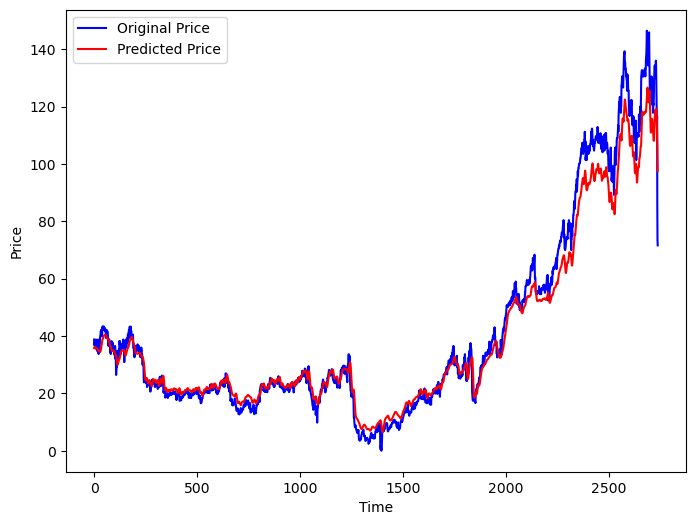

<Figure size 640x480 with 0 Axes>

In [43]:
plt.figure(figsize=(8,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
plt.savefig('LSTM_with_1_feature.jpg')

In [106]:
df4

Close price      ema_50  volatility_30       MACD        rsi  \
42          155.0  153.562338       4.473227  -0.460608  77.397260   
43          154.3  153.591266       4.317781  -0.189362  79.020979   
44          152.2  153.536707       4.074936  -0.142211  70.625000   
45          152.0  153.476444       3.879668  -0.119604  70.186335   
46          153.8  153.489132       3.789222   0.043062  75.722543   
...           ...         ...            ...        ...        ...   
9191        247.1  273.610933      10.605488  -3.157287  30.029155   
9192        252.9  272.798739      11.103292  -4.202891  32.773109   
9196        196.1  269.790946      17.502645  -9.505254  16.360734   
9199        175.5  266.093262      24.276109 -15.194509  11.690141   
9200        172.5  262.422938      29.389685 -19.718063  11.448276   

      Rolling Mean  Rolling Std  day_of_week  month  
42      152.070000     4.473227            0      6  
43      151.923333     4.317781            4      5  
44      151.680000     4.074936            3      5  
45      151.470000     3.879668            2      5  
46      151.380000     3.789222            1      5  
...            ...          ...          ...    ...  
9191    271.150000    10.605488            3      2  
9192    270.463333    11.103292            2      2  
9196    267.850000    17.502645            3      2  
9199    264.646667    24.276109            0      2  
9200    261.146667    29.389685            4      2  

[9094 rows x 9 columns]

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Model Architecture
model = Sequential()

model.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 8)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 50)             11800     
                                                                 
 dropout_12 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_13 (LSTM)              (None, 1, 60)             26640     
                                                                 
 dropout_13 (Dropout)        (None, 1, 60)             0         
                                                                 
 lstm_14 (LSTM)              (None, 1, 80)             45120     
                                                                 
 dropout_14 (Dropout)        (None, 1, 80)             0         
                                                                 
 lstm_15 (LSTM)              (None, 120)              

In [105]:
# Train the model
%time
model.fit(X_train, y, epochs=50, batch_size=32)

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/50
285/285 [==============================] - 10s 6ms/step - loss: 7276.9575
Epoch 2/50
285/285 [==============================] - 2s 6ms/step - loss: 4205.9224
Epoch 3/50
285/285 [==============================] - 2s 6ms/step - loss: 3136.3613
Epoch 4/50
 74/285 [======>.......................] - ETA: 1s - loss: 3103.9993

KeyboardInterrupt: 

In [79]:
import lime
import lime.lime_tabular
import numpy as np

# Ensure the input data is 2D for LIME
x_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# Define a function that uses the LSTM model for predictions
def lstm_predict(input_data):
    # Reshape the input data to the original shape expected by the LSTM
    input_data = input_data.reshape((input_data.shape[0], X_train.shape[1], 17))
    return model.predict(input_data)

# Set up the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    x_train_reshaped,  # Use reshaped 2D version of the input data
    mode='regression',
    training_labels=None,  # Optional if not dealing with classification labels
    feature_names=df_clean.drop(['Date','ema_12','Close price'],axis=1).columns,  # Ensure feature names match your dataset
    verbose=True,
    random_state=42
)

# Choose an instance to explain (let's take the first row from x_test)
instance_to_explain = X_train[0].reshape(1, -1)  # Reshape to 2D for LIME

# Generate the explanation using LIME
explanation = explainer.explain_instance(
    instance_to_explain[0],   # The instance we want to explain
    lstm_predict               # The function used for predictions
)

# Display the LIME explanation
explanation.show_in_notebook()


157/157 [==============================] - 1s 3ms/step
Intercept 69.97845244450718
Prediction_local [174.73591857]
Right: 149.90782


In [51]:
df2=df_clean[['Low price','High price','Open price','MACD','Rolling Mean','ma_30','ema_50','bollinger_upper','Close price']]

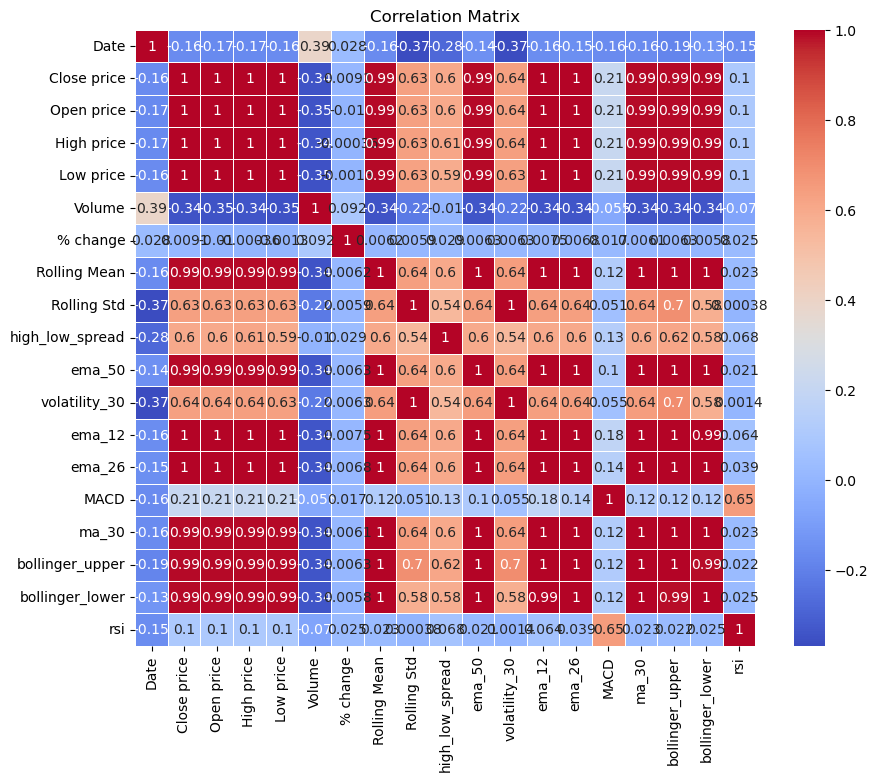

In [56]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [84]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming your DataFrame is named df
# Step 1: Separate Features and Target Variable
X = df2.drop(['Close price'], axis=1)  # Exclude the target variable
y = df2['Close price']  # Target variable

# Step 2: Normalize the Features
scaler = MinMaxScaler()  # Initialize the scaler
X_scaled = scaler.fit_transform(X)  # Fit and transform the data

# Step 3: Reshape the Data for LSTM
# LSTM requires input in the shape (samples, timesteps, features)
# For this example, let's assume we want to use 1 timestep
X_train = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])  # Reshape to (samples, 1, features)

# Optionally, you can check the shape of your training data
print("Shape of X_train:", X_train.shape)
print("Shape of y:", y.shape)

Shape of X_train: (9102, 1, 8)
Shape of y: (9102,)


In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Model Architecture
model = Sequential()

model.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 8)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 1, 50)             11800     
                                                                 
 dropout_20 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_22 (LSTM)              (None, 1, 60)             26640     
                                                                 
 dropout_21 (Dropout)        (None, 1, 60)             0         
                                                                 
 lstm_23 (LSTM)              (None, 1, 80)             45120     
                                                                 
 dropout_22 (Dropout)        (None, 1, 80)             0         
                                                                 
 lstm_24 (LSTM)              (None, 120)              

In [90]:
# Train the model
%time
model.fit(X_train, y, epochs=50, batch_size=32)

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/50


StagingError: in user code:

    File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1154, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\optimizers\optimizer.py", line 543, in minimize
        grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\optimizers\optimizer.py", line 276, in compute_gradients
        grads = tape.gradient(loss, var_list)

    LookupError: gradient registry has no entry for: shap_DivNoNan


## Arima

In [156]:
pip install statsmodels pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   -- ------------------------------------ 41.0/614.7 kB 326.8 kB/s eta 0:00:02
   -- ------------------------------------ 41.0/614.7 kB 326.8 kB/s eta 0:00:02
   ------- ------------------------------ 122.9/614.7 kB 599.1 kB/s eta 0:00:01
   ------- ------------------------------ 122.9/614.7 kB 599.1 kB/s eta 0:00:01
   ------------- ------------------------ 215.0/614.7 kB 689.6 kB/s eta 0:00:01
   ---------------- --------------------- 266.2/614.7 kB 778.1 kB/s eta 0:00:01
   --------------------- ---------------- 348.2/614.7 kB 901.1 kB/s eta 0:00:01
   ------------------------------- -------- 491.5/614.7 kB 1.2 MB/s eta 0:00:01
   --------------------------------- ------ 522.2/614.7 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 1.2 MB

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


ADF Statistic: -2.0847772496429906
p-value: 0.2506796370331724
Data is not stationary, apply differencing


C:\Users\HP\AppData\Local\Temp\ipykernel_868\2022161985.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Close_diff'] = df4['Close price'].diff().dropna()


ADF Statistic: -11.924381524412789
p-value: 4.946344362898922e-22
Data is stationary
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=38004.694, Time=12.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=38007.856, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=37999.416, Time=0.83 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=37999.400, Time=1.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=38005.865, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=38001.400, Time=1.99 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=38001.400, Time=1.68 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=38003.400, Time=2.38 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=37997.408, Time=0.64 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=37999.408, Time=0.81 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=37999.408, Time=0.86 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=37997.424, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=38001.408, Time=1.08 sec


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

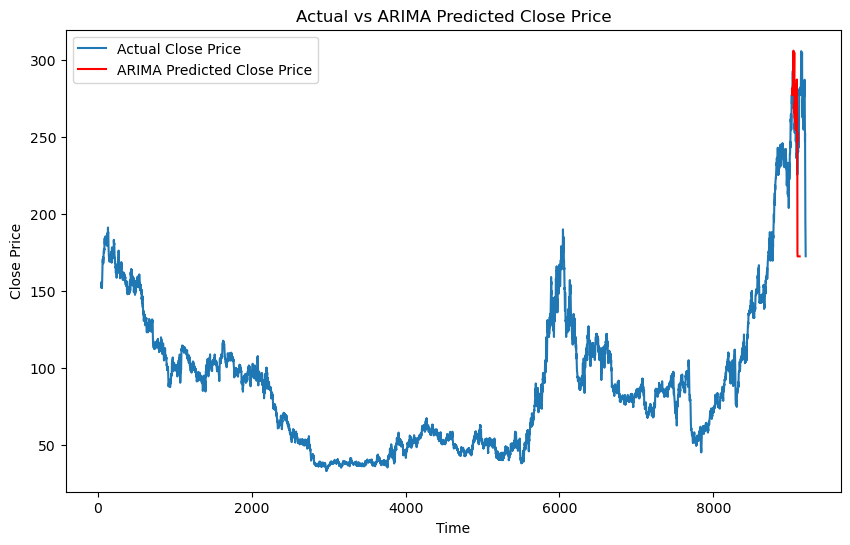

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

# Assuming your dataset is loaded into 'df' and the close price is the target variable
# df['Close'] contains the close price

# Step 1: Check Stationarity with Augmented Dickey-Fuller Test
def check_stationarity(data):
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is not stationary, apply differencing")

# Check if close price is stationary
check_stationarity(df4['Close price'])

# Step 2: If data is not stationary, apply differencing
df4['Close_diff'] = df4['Close price'].diff().dropna()

# Recheck stationarity after differencing
check_stationarity(df4['Close_diff'].dropna())

# Step 3: Determine p, d, q values using auto_arima
auto_model = auto_arima(df4['Close price'], seasonal=False, trace=True,
                        error_action='ignore', suppress_warnings=True)

print(auto_model.summary())

# The auto_arima method will give the best values for p, d, q
# Step 4: Fit the ARIMA model
p, d, q = auto_model.order
model = ARIMA(df4['Close price'], order=(p, d, q))
arima_result = model.fit()

# Step 5: Plot the actual vs predicted values
df4['ARIMA_Prediction'] = arima_result.predict(start=len(df)-100, end=len(df)-1)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(df4['Close price'], label='Actual Close Price')
plt.plot(df4['ARIMA_Prediction'], color='red', label='ARIMA Predicted Close Price')
plt.title('Actual vs ARIMA Predicted Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()